In [1]:
from osgeo import gdal
import fiona
import numpy as np
import pandas as pd
import geopandas as gpd

import rasterio as rio

from nansat import Nansat
from nansat import *

from s1denoise import Sentinel1Image
from s1denoise import *

import matplotlib.pyplot as plt
%matplotlib inline

import scipy
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.datasets import make_classification
from sklearn import preprocessing

import matplotlib as mpl

In [3]:
feb_pred = Nansat('/container_dir1/results/RFC_S1_pred_feb.tif')
march_pred = Nansat('/container_dir1/results/RFC_S1_pred_march.tif')
april_pred = Nansat('/container_dir1/results/RFC_S1_pred_april.tif')
#may_pred = Nansat('/container_dir1/results/RFC_S1_pred_may.tif')

In [4]:
june_pred = Nansat('/container_dir1/results/RFC_S1_pred_june.tif')
july_pred = Nansat('/container_dir1/results/RFC_S1_pred_july2.tif')
#aug_pred 
# forgot to save august and may -.-
sep_pred = Nansat('/container_dir1/results/RFC_S1_pred_sep.tif')
nov_pred = Nansat('/container_dir1/results/RFC_S1_pred_nov.tif')
dec_pred = Nansat('/container_dir1/results/RFC_S1_pred_dec.tif')

In [20]:
# store them all in a list because all those single plots are annoying
pred = (feb_pred[1], march_pred[1], april_pred[1], june_pred[1], july_pred[1], sep_pred[1], nov_pred[1], dec_pred[1])

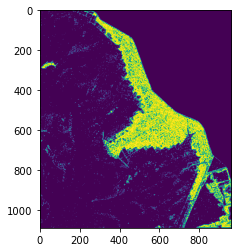

In [21]:
# turn the list into Artyom´s favourite: Array - Hurray!
pred_arr = np.array(pred)
plt.imshow(feb_pred[1])

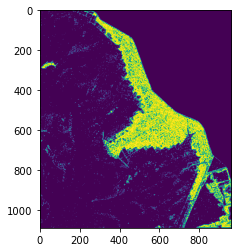

In [23]:
plt.imshow(pred_arr[0])

In [69]:
# Label the classes (labels) and the months (names)
labels = ['Not saltmarsh', 'Saltmarsh']
names = ['February', 'March', 'April', 'June', 'July', 'September', 'November', 'December']
#colors = ['darkblue', 'yellow']
# Calculate the class distribution for each prediction date and generate a nice basic b pie chart 
for i in range(pred_arr.shape[0]):
    raster_pred = pred_arr[i]
    #count the classes
    Y = np.count_nonzero(raster_pred == 1)
    X = np.count_nonzero(raster_pred == 6)
    classes = [Y, X]
    #plot the distribution
    fig = plt.figure(figsize=(10,10))  
    plt.pie(classes, 
            labels=labels, 
            autopct='%1.1f%%', 
#            colors=colors,
            textprops=dict({'fontsize':13}))
    plt.title("Random Forest class distribution "+names[i]+" 2021\n\n"+
              "Saltmarsh: "+str(X)+"\nNot saltmarsh: "+str(Y), fontsize=16)
    #Save the plots
    plt.savefig('pie_'+names[i]+'_2021.png')
    #Close the plots, so they don´t overwrite each other
    plt.close()

In [63]:
# trying to get the same colors of rfc for the pie chart
cmap = mpl.cm.get_cmap('viridis')
bluetone = cmap(0)
yellowtone = cmap(1)
bluetone, yellowtone

((0.267004, 0.004874, 0.329415, 1.0), (0.26851, 0.009605, 0.335427, 1.0))

In [68]:
# Plot classifications, all of them 
for i in range(pred_arr.shape[0]):
    fig = plt.figure(figsize=(50,50))
    plt.axis("off")
    plt.imshow(pred_arr[i])
    plt.title("Binary Random Forest Classification\n"
              +names[i]+" Sentinel-1 2021", fontsize=55)
    plt.savefig("RFC_bin_2021_"+names[i]+".png")
    plt.close()